# DIP Assignment 4

Arghya Roy (2021115008)

imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Task 1

Image Segmentation Using Thresholding

### a

Load a grayscale image and implement the following thresholding methods to segment the image:
- Binary Thresholding
- Adaptive Thresholding
- Otsu’s Thresholding

In [8]:

lenna = cv2.imread('./images/Lenna.png', cv2.IMREAD_GRAYSCALE)

_, lenna_bin = cv2.threshold(lenna, 127, 255, cv2.THRESH_BINARY)

lenna_ada = cv2.adaptiveThreshold(lenna, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

_, lenna_otsu = cv2.threshold(lenna, 0, 255, cv2.THRESH_OTSU)

### b

Display the original and segmented images side by side for comparison, ensuring each method is clearly labeled.

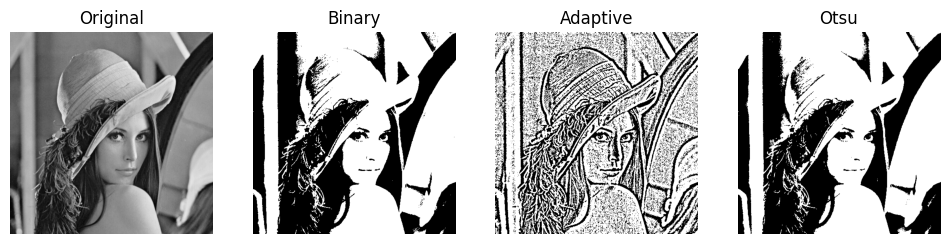

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(141)
plt.imshow(lenna, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(142)
plt.imshow(lenna_bin, cmap='gray')
plt.title('Binary')
plt.axis('off')

plt.subplot(143)
plt.imshow(lenna_ada, cmap='gray')
plt.title('Adaptive')
plt.axis('off')

plt.subplot(144)
plt.imshow(lenna_otsu, cmap='gray')
plt.title('Otsu')
plt.axis('off')

plt.show()


### c

In 2-3 sentences, discuss which method provided the best segmentation for your image and why. Consider factors like clarity of object boundaries and noise levels.

tbd